In [1]:
import pypsa
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from datetime import datetime
from cartopy import crs as ccrs
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches
import plotly
import plotly.express as px
import os, sys
sns.set_theme("paper", style="darkgrid")

In [33]:
num_clusters = 30
resources_folder= os.path.join(os.path.dirname(os.getcwd()), 'resources')
# n_full = pypsa.Network(os.path.join(resources_folder, 'western/elec.nc'))
# n_western_addelec = pypsa.Network(os.path.join(resources_folder, 'western/elec_base_network_l_pp.nc'))
# n_western_s = pypsa.Network(os.path.join(resources_folder, 'western/elec_s.nc'))
n_clustered = pypsa.Network(os.path.join(resources_folder, f'western/elec_s_{num_clusters}.nc'))
n_clustered_ec = pypsa.Network(os.path.join(resources_folder, f'western/elec_s_{num_clusters}_ec.nc'))
n_clustered_ec_prepared = pypsa.Network(os.path.join(resources_folder, f'western/elec_s_{num_clusters}_ec.nc'))

INFO:pypsa.io:Imported network elec_s_30.nc has buses, carriers, generators, lines, links, loads
INFO:pypsa.io:Imported network elec_s_30_ec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


In [34]:
n_clustered_ec.lines.capital_cost

Line
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
55    0.0
56    0.0
57    0.0
58    0.0
Name: capital_cost, dtype: float64

<Axes: xlabel='snapshot'>

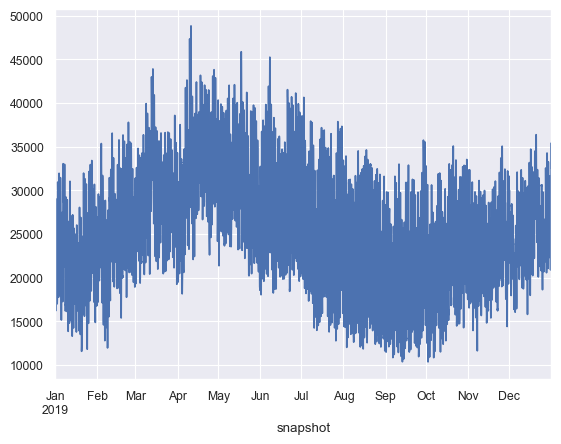

In [27]:
ts_gens = n_clustered.generators_t.p_max_pu.columns
pnom_gens  = n_clustered.generators.loc[ts_gens].p_nom
dispatch = n_clustered.generators_t.p_max_pu * pnom_gens
dispatch.sum(axis=1).plot()

In [42]:
DATA= os.path.join(os.path.dirname(os.getcwd()), 'data')
bus2sub = pd.read_csv(DATA + '/breakthrough_network/base_grid/bus2sub.csv')
sub = pd.read_csv(DATA + '/breakthrough_network/base_grid/sub.csv')
lines = pd.read_csv(DATA + '/breakthrough_network/base_grid/branch.csv')


In [29]:
df_full =  n_full.buses
df_full['bus_id'] = df_full.index.astype(int)
df_full = pd.merge(df_full, bus2sub,on='bus_id',how='left')
df_full = pd.merge(df_full, sub, on='sub_id',how='left')
df_full.to_csv('full_network_buses.csv')


,Pd,v_nom,zone_id,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network,bus_id
Bus,,,,,,,,,,,,,,
2010001,9.64,138.0,201,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,,2010001
2010002,15.98,138.0,201,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,,2010002
2010003,14.39,138.0,201,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,,2010003
2010004,0.00,138.0,201,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,,2010004
2010005,10.45,138.0,201,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,,2010005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090019,0.00,138.0,202,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,,2090019
2090020,0.00,138.0,201,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,,2090020
2090021,0.00,138.0,201,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,,2090021


In [13]:
n_clustered.iplot(mapbox=True, 
                  mapbox_token='pk.eyJ1Ijoia3RlaHJhbmNoaSIsImEiOiJjbDJzNW5kdHMwaGJzM2pudDBsazZ5am80In0.hQfjJnhiiO1-YcJEEpN-1A',
                  size= (1000,700));

In [14]:
# n_clustered.lines.loc[n_clustered.lines.bus0 == 'CISO-PGAE0 12']
# n_clustered.lines.loc[n_clustered.lines.bus0== 'CISO-PGAE0 18']
n_clustered.buses

,v_nom,x,y,country,control,generator,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
AVA0 0,230.0,-117.274760,47.739976,AVA,Slack,AVA0 0 hydro,,AC,None,1.0,0.0,inf,
Arizona0 0,230.0,-112.006864,33.505456,Arizona,PQ,,,AC,None,1.0,0.0,inf,
Arizona0 1,230.0,-111.469136,36.247791,Arizona,PQ,,,AC,None,1.0,0.0,inf,
Arizona0 2,230.0,-109.805932,35.013650,Arizona,PQ,,,AC,None,1.0,0.0,inf,
Arizona0 3,230.0,-114.114283,34.314715,Arizona,PQ,,,AC,None,1.0,0.0,inf,
BANC0 0,230.0,-121.368319,38.541173,BANC,PQ,,,AC,None,1.0,0.0,inf,
BPAT0 0,230.0,-119.384132,46.290319,BPAT,PQ,,,AC,None,1.0,0.0,inf,
BPAT0 1,230.0,-114.848444,47.970011,BPAT,PQ,,,AC,None,1.0,0.0,inf,
BPAT0 2,230.0,-122.945153,45.171618,BPAT,PQ,,,AC,None,1.0,0.0,inf,


## Bus Map Clustering Issues

In [51]:
bus2sub = pd.read_csv('/Users/kamrantehranchi/Library/CloudStorage/OneDrive-Stanford/Kamran_OSW/PyPSA_Models/pypsa-breakthroughenergy-usa/workflow/data/base_grid/bus2sub.csv')
sub = pd.read_csv('/Users/kamrantehranchi/Library/CloudStorage/OneDrive-Stanford/Kamran_OSW/PyPSA_Models/pypsa-breakthroughenergy-usa/workflow/data/base_grid/sub.csv')
bus2sub

,bus_id,sub_id,interconnect
0,1,0,Eastern
1,2,0,Eastern
2,3,0,Eastern
3,4,0,Eastern
4,5,0,Eastern
...,...,...,...
82066,3008156,41010,Texas
82067,3008157,41010,Texas
82068,3008158,41011,Texas
82069,3008159,41011,Texas


In [52]:
simplifiedNetwork = pypsa.Network(Simplified_WECC_network)
bus_df = simplifiedNetwork.buses
bus_df['bus_id'] = bus_df.index.astype(int)
bus_df = pd.merge(bus_df, bus2sub, on='bus_id')
bus_df[bus_df.sub_id == 41063]

INFO:pypsa.io:Imported network elec_ss.nc has buses, carriers, generators, lines, links, loads


,v_nom,x,y,control,generator,interconnect_x,substation_lv,substation_off,country,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network,bus_id,sub_id,interconnect_y


In [60]:
busmap_path = '/Users/kamrantehranchi/Library/CloudStorage/OneDrive-Stanford/Kamran_OSW/PyPSA_Models/pypsa-breakthroughenergy-usa/workflow/resources/western/busmap_s_100.csv'
busmap = pd.read_csv(busmap_path)
busmap

,Bus,busmap
0,35377,AVA0 0
1,35380,AVA0 0
2,35381,AVA0 0
3,35383,AVA0 0
4,35384,AVA0 0
...,...,...
4781,39411,WACM0 0
4782,39578,WACM0 0
4783,37712,WALC0 0
4784,37713,WALC0 0


In [61]:
#looking at offshore buses
busmap[busmap.Bus == 37584]
simplifiedNetwork.lines[simplifiedNetwork.lines.bus0 == '37584']
simplifiedNetwork.buses[simplifiedNetwork.buses.index == '37556']

,v_nom,x,y,control,generator,interconnect,substation_lv,substation_off,country,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network,bus_id
Bus,,,,,,,,,,,,,,,,,
37556,230.0,-117.153,32.7919,PQ,,Western,True,True,CISO-SDGE,,AC,None,1.0,0.0,inf,,37556


In [62]:
buses_w_load = simplifiedNetwork.buses.loc[simplifiedNetwork.loads_t.p_set.columns]
buses_w_load['annualLoad']= simplifiedNetwork.loads_t.p_set.sum()*10000/ simplifiedNetwork.loads_t.p_set.sum().sum()

In [63]:
buses_w_load['Bus'] = buses_w_load.reset_index().Load.astype(int)

In [64]:
buses_w_load =pd.merge(buses_w_load, busmap, left_on='Bus', right_on='Bus')

In [65]:
geom = gpd.points_from_xy(x= buses_w_load.x, y= buses_w_load.y)
gdf = gpd.GeoDataFrame(buses_w_load,geometry=geom,crs=4326)
# gdf.plot(markersize='annualLoad',figsize=(10,10))
gdf.explore()

ValueError: Location values cannot contain NaNs.

In [42]:
buslist = busmap[busmap.busmap == 'US0 0'].Bus
USBuses = simplifiedNetwork.buses.loc[buslist.values.astype(str)]
USBuses.to_csv('/Users/kamrantehranchi/Library/CloudStorage/OneDrive-Stanford/Kamran_OSW/PyPSA_Models/GIS/USBuses.csv')
simplifiedNetwork.buses.to_csv('/Users/kamrantehranchi/Library/CloudStorage/OneDrive-Stanford/Kamran_OSW/PyPSA_Models/GIS/AllBuses.csv')
USBuses

,v_nom,x,y,control,generator,interconnect,substation_lv,substation_off,country,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,,,,
37584,230.0,-117.175000,32.508500,PQ,,Western,True,True,US,,AC,None,1.0,0.0,inf,
41059,230.0,-117.644779,32.776698,PQ,,Western,True,True,US,,AC,None,1.0,0.0,inf,
41060,230.0,-118.897220,33.640736,PQ,,Western,True,True,US,,AC,None,1.0,0.0,inf,
41061,230.0,-120.039798,34.187767,PQ,,Western,True,True,US,,AC,None,1.0,0.0,inf,
41062,230.0,-121.182376,35.217395,PQ,,Western,True,True,US,,AC,None,1.0,0.0,inf,
41064,230.0,-122.215091,36.526014,PQ,,Western,True,True,US,,AC,None,1.0,0.0,inf,
41065,230.0,-122.709476,37.194061,PQ,,Western,True,True,US,,AC,None,1.0,0.0,inf,
41066,230.0,-123.269779,38.029530,PQ,,Western,True,True,US,,AC,None,1.0,0.0,inf,
41067,230.0,-123.522464,38.521137,PQ,,Western,True,True,US,,AC,None,1.0,0.0,inf,


In [14]:
geom = gpd.points_from_xy(x= USBuses.x, y= USBuses.y)
gdf = gpd.GeoDataFrame(USBuses,geometry=geom,crs=4326)
gdf.explore()

In [13]:
# regions_onshore_path = '/Users/kamrantehranchi/Library/CloudStorage/OneDrive-Stanford/Kamran_OSW/PyPSA_Models/pypsa-breakthroughenergy-usa/workflow/resources/western/regions_onshore_s_100.geojson'
BA_shapes_path = '/Users/kamrantehranchi/Library/CloudStorage/OneDrive-Stanford/Kamran_OSW/PyPSA_Models/pypsa-breakthroughenergy-usa/workflow/repo_data/BE_BA_shapes/remap_ba_area.shp'
gdf = gpd.read_file(BA_shapes_path)
# gdf.set_index('name')
gdf.crs

ERROR:fiona._env:PROJ: proj_identify: /Users/kamrantehranchi/opt/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
INFO:fiona.ogrext:Failed to auto identify EPSG: 7


<Geographic 2D CRS: GEOGCS["GCS_North_American_1983",DATUM["D_North_Am ...>
Name: NAD83
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
gdf.explore()

In [ ]:
from itertools import combinations

gdf.geometry = gdf.geometry.buffer(0.001)

poly = gdf.geometry
for p1_idx, p2_idx in combinations(poly.index, 2):
    if poly.loc[p1_idx].intersects(poly.loc[p2_idx]):
        # Store intermediary results back to poly
        poly.loc[p2_idx] -= poly.loc[p1_idx]

        
gdf["geometry"] = poly

gdf.explore()

/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/ipykernel_73871/1775035747.py:24: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/ipykernel_73871/1775035747.py:24: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/ipykernel_73871/1775035747.py:24: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/00/vqry7y9s78q3rvf_m_jmk

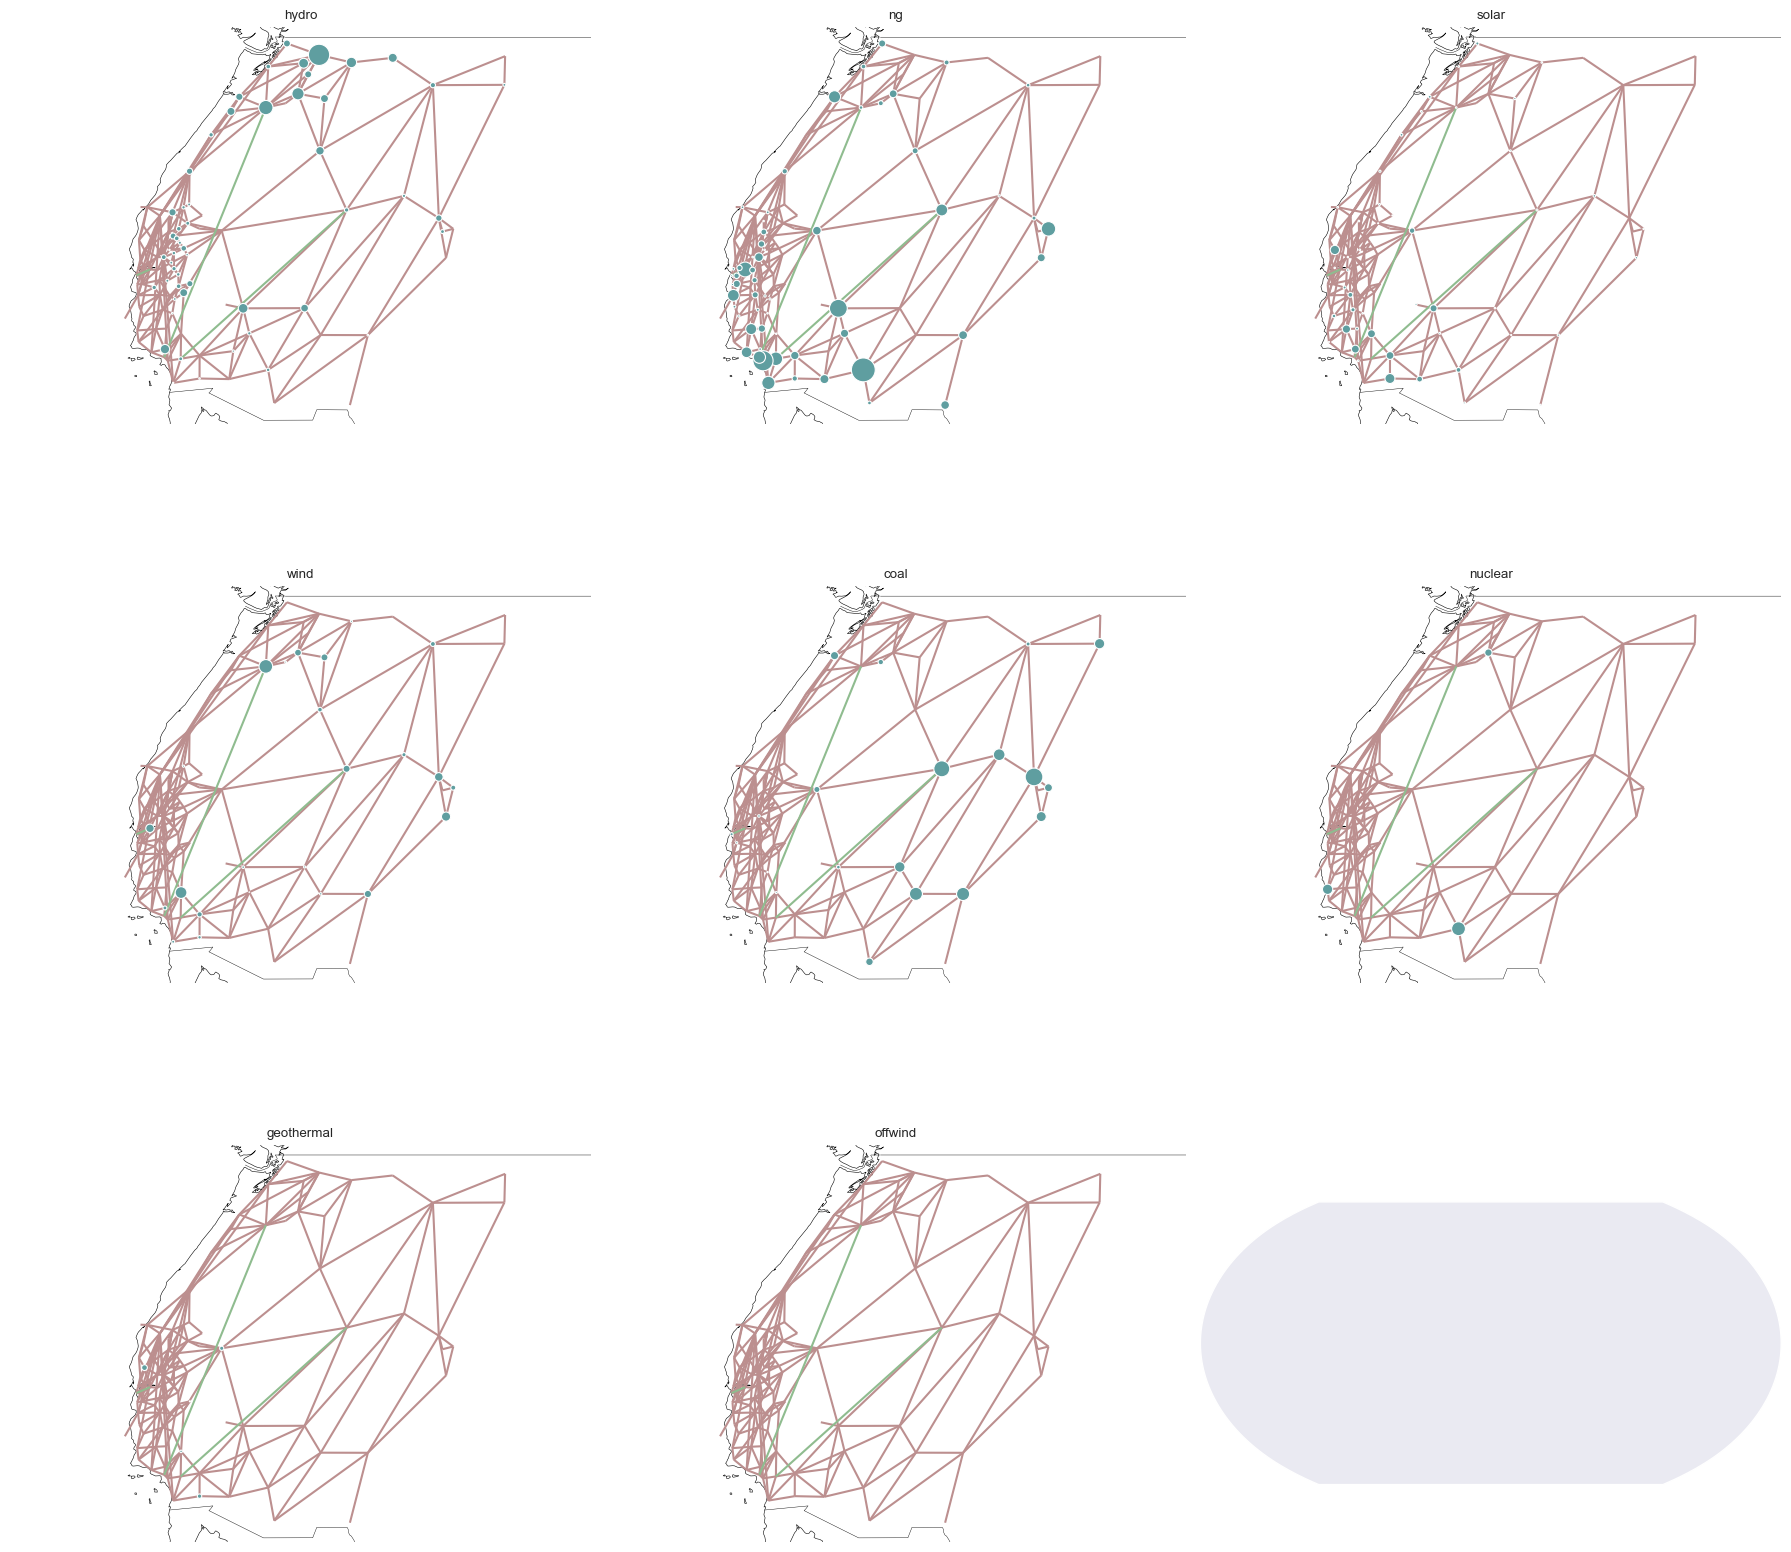

In [19]:
techs = ['hydro', 'ng', 'solar', 'wind', 'coal', 'nuclear', 'geothermal','offwind']

n_graphs = len(techs)
n_cols = 3
if n_graphs % n_cols == 0:
    n_rows = n_graphs // n_cols
else:
    n_rows = n_graphs // n_cols + 1


fig, axes = plt.subplots(
    nrows=n_rows, ncols=n_cols, subplot_kw={"projection": ccrs.EqualEarth()}
);
size = 6
fig.set_size_inches(size * n_cols, size * n_rows);

for i, tech in enumerate(techs):
    i_row = i // n_cols
    i_col = i % n_cols

    ax = axes[i_row, i_col]
    gens = n_clustered.generators[n_clustered.generators.carrier == tech]
    gen_distribution = (
        gens.groupby("bus").sum()["p_nom"].reindex(n_clustered.buses.index, fill_value=0.0)
    );
    n_clustered.plot(ax=ax, bus_sizes=2e-5 * gen_distribution);
    ax.set_title(tech);
fig.tight_layout();

## Exports for GIS Mapping

In [ ]:
#Combining lines gps points based on bus gps points. This makes plotting in qgis easier.
lines_gis = n_clustered.lines.copy(deep=True)
lines_gis['x1'] = n_clustered.buses.loc[lines_gis.bus0].x.values
lines_gis['y1'] = n_clustered.buses.loc[lines_gis.bus0].y.values
lines_gis['x2'] = n_clustered.buses.loc[lines_gis.bus1].x.values
lines_gis['y2'] = n_clustered.buses.loc[lines_gis.bus1].y.values
lines_gis.to_csv('elec_s_60_lines_gis.csv')
n_clustered.buses.to_csv('elec_s_60_buses.csv')


In [ ]:
#Combining lines gps points based on bus gps points. This makes plotting in qgis easier.
lines_gis = n_ss.lines.copy(deep=True)
lines_gis['x1'] = n_ss.buses.loc[lines_gis.bus0].x.values
lines_gis['y1'] = n_ss.buses.loc[lines_gis.bus0].y.values
lines_gis['x2'] = n_ss.buses.loc[lines_gis.bus1].x.values
lines_gis['y2'] = n_ss.buses.loc[lines_gis.bus1].y.values
lines_gis.to_csv('elec_ss_lines_gis.csv')
n_ss.buses.to_csv('elec_ss_buses.csv')